In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [72]:
df = pd.read_csv("./data/팬스타엔터프라이즈_시세.csv", encoding='euc-kr').sort_values("일자").reset_index(drop=True)
df_gong = pd.read_csv("./data/팬스타엔터프라이즈_공매도.csv", encoding='euc-kr')
df_gong2 = pd.read_csv("./data/팬스타엔터프라이즈_공매도2.csv", encoding='euc-kr')

In [73]:
gong = pd.concat([df_gong, df_gong2]).sort_values("일자").reset_index(drop = True)

In [74]:
total = pd.merge(df, gong, on = "일자").sort_values('일자').reset_index(drop=True)

In [75]:
price = list(total["시가"][30:])

In [76]:
ddd = pd.read_csv("./data/팬스타엔터프라이즈_시세2.csv", encoding='euc-kr')

In [77]:
for i in ddd["시가"][:30]:
    price.append(i)

In [78]:
total["price"] = price

In [79]:
foreign = pd.read_csv("./data/팬스타엔터프라이즈_외국인.csv", encoding='euc-kr')
foreign2 = pd.read_csv("./data/팬스타엔터프라이즈_외국인2.csv", encoding='euc-kr')

In [80]:
total["외국인 지분율"] = pd.concat([foreign, foreign2]).sort_values("일자").reset_index(drop = True)["외국인 지분율"]

In [81]:
total = total.drop(total[["대비", "종가", "고가", "저가", '공매도 수량_순보유잔고수량', "공매도 수량_거래량_업틱룰적용", "공매도 금액_거래대금_업틱룰적용", "상장주식수", "시가총액", "거래대금", "공매도 수량_거래량_전체", "공매도 수량_거래량_업틱룰예외", "공매도 금액_거래대금_전체", "공매도 금액_거래대금_업틱룰예외"]], axis = 1)

In [82]:
x = total.drop(["일자", "price"], axis = 1)
y = total["price"]

In [83]:
knr = KNeighborsRegressor()

mm = MinMaxScaler()
scaled_x = mm.fit_transform(x)

In [84]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 0)

In [85]:
knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))
y_pred= knr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

0.884962405026978
0.8149329309284306


57.77218539578891

<Axes: >

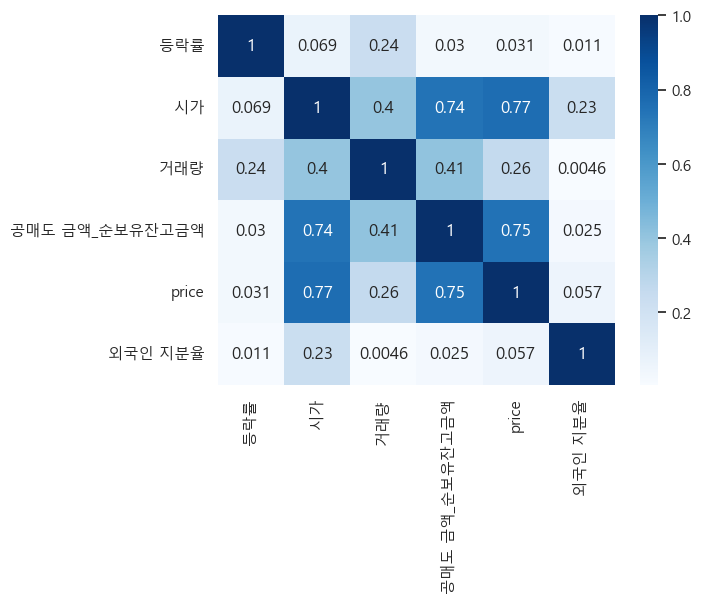

In [86]:
plt.rc("font", family = "Malgun Gothic")

sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
corr_matrix = total.drop("일자", axis = 1).corr()
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")

In [87]:
up_down = []
for i in total.index:
    if total["시가"][i] < total["price"][i]:
        up_down.append(1)
    else:
        up_down.append(0)
        
total["up_down"] = up_down

In [88]:
x_2 = total.drop(["price", "일자","up_down"], axis = 1)
y_2 = total["up_down"]
scaled_x_2 = mm.fit_transform(x_2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(scaled_x_2, y_2, test_size = 0.2, random_state = 0)

In [89]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 0)
rf.fit(x_train_2, y_train_2)
print(rf.score(x_train_2, y_train_2))
print(rf.score(x_test_2, y_test_2))
y_pred_2 = rf.predict(x_test_2)
print(len(y_test), (y_test_2 == y_pred_2).sum())

1.0
0.8513513513513513
148 126


In [90]:
y_pred_2

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)